In [14]:
import numpy as np
import scipy.linalg as la
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt

In [3]:
D = pickle.load(open("MNISTsmall.p", 'rb'))

X = D['X'] * 1.0
y = D['trueClass']
f1 = D['foldTrain']

X1 = X[:, f1]
y1 = y[f1]

In [6]:
print(X1.shape)
print(y1.shape)

(784, 10000)
(10000,)


In [8]:
X1a = X1[:, y1==7][:, : 312]

print(X1a.shape)

(784, 15000)


In [17]:
C = np.cov(X1a)

print(C.shape)

(784, 784)


In [18]:
u, V = la.eig(C)

u = u.real
V = V.real

idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

In [19]:
W = V[:, :11]

print(W.shape)

(784, 11)


In [20]:
x = X1a[:, 26]

xr = np.dot(W, np.dot(W.T, x))

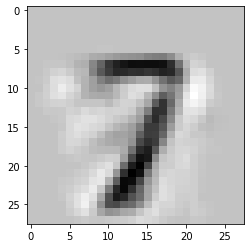

In [21]:
plt.imshow(xr.reshape(28, 28), cmap='binary')

In [22]:
print(np.mean((x - xr) ** 2))

860.3779272129444


- Pelo PCA

In [23]:
pca = PCA(n_components=11).fit(X1a.T)
Xp = pca.transform(X1a.T)

In [25]:
print(Xp.shape)

(312, 11)


In [26]:
np.mean(Xp, axis=0)

array([-1.66886448e-13, -7.28761780e-16,  3.27942801e-15,  3.90798505e-14,
        1.52356760e-14,  9.61965550e-14,  5.54769905e-14, -6.43360009e-15,
        4.91914202e-15,  2.91504712e-14,  1.12958076e-14])

In [28]:
xr = pca.inverse_transform(pca.transform(x[np.newaxis, :]))

In [29]:
print(np.mean((x-xr) ** 2))

693.0055722194603
